<a href="https://colab.research.google.com/github/pinzii-maz/absen-instansi/blob/master/tugaspemrograman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Langkah 1: Membuat Data Mahasiswa ---
Berhasil membuat 250 data.
Contoh 5 data pertama:
       No                Nama  berat_badan  tinggi_badan  lingkar_pinggang  \
0  MHS001    Drs. Emin Sinaga           74           155               103   
1  MHS002       Nurul Rahimah           60           159                77   
2  MHS003      Zaenab Hariyah           60           157                81   
3  MHS004        Tami Prayoga           81           168                89   
4  MHS005  Prasetya Puspasari           65           173                70   

   tekanan_darah  
0            119  
1            114  
2             90  
3            153  
4            110  


--- Langkah 2: Menampilkan Sebaran Data Awal ---
Grafik sebaran data awal sedang ditampilkan...


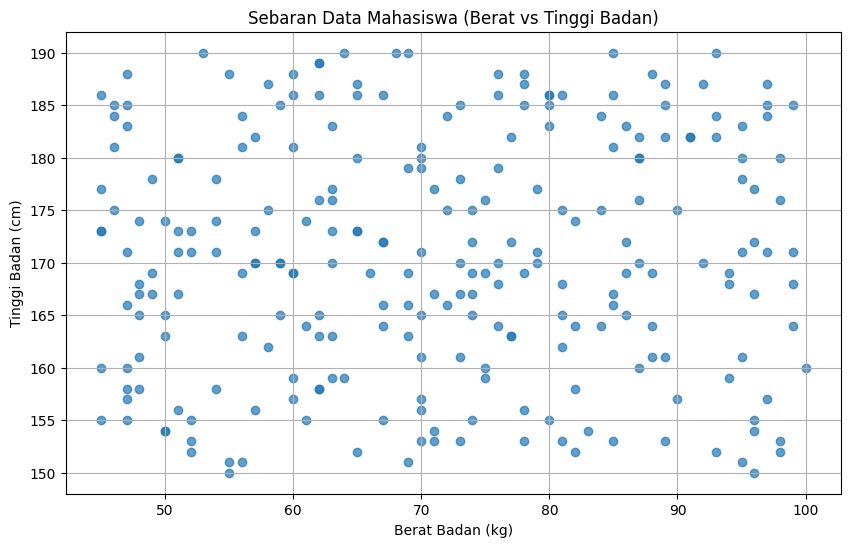



--- Langkah 3: Mengelompokkan Data dengan K-Means ---
Data berhasil dikelompokkan ke dalam 4 cluster.
Contoh data setelah ditambahkan label cluster:
       No                Nama  berat_badan  tinggi_badan  lingkar_pinggang  \
0  MHS001    Drs. Emin Sinaga           74           155               103   
1  MHS002       Nurul Rahimah           60           159                77   
2  MHS003      Zaenab Hariyah           60           157                81   
3  MHS004        Tami Prayoga           81           168                89   
4  MHS005  Prasetya Puspasari           65           173                70   

   tekanan_darah  cluster  
0            119        3  
1            114        2  
2             90        3  
3            153        1  
4            110        2  


--- Langkah 4: Menampilkan Anggota Setiap Cluster & Visualisasi Hasil ---
Grafik hasil clustering sedang ditampilkan...


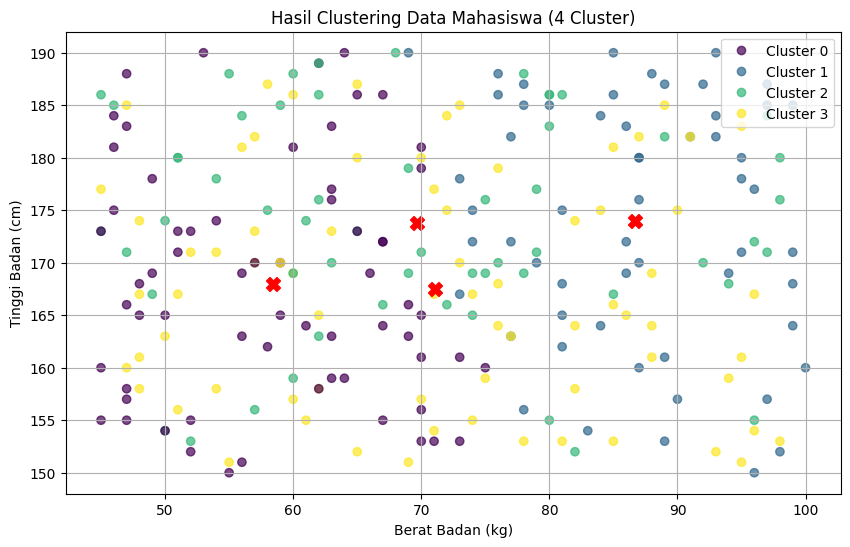


--- ANGGOTA CLUSTER 0 ---
         No                           Nama  berat_badan  tinggi_badan  lingkar_pinggang  tekanan_darah
10   MHS011               Hartana Prasetyo           54           174                91            150
11   MHS012                 Vera Maheswara           56           163                60            148
15   MHS016     dr. Yani Manullang, M.Kom.           47           157               105            138
21   MHS022                Karta Wijayanti           63           163                62            141
27   MHS028                  Dalima Irawan           64           190                91            153
29   MHS030         Vanya Zulkarnain, S.Pt           48           168                74            134
38   MHS039                  Elma Mahendra           46           181               109            150
43   MHS044              Ophelia Manullang           51           171                94            149
46   MHS047  Sutan Ikhsan Zulkarnain, S.Gz    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from faker import Faker

print("--- Langkah 1: Membuat Data Mahasiswa ---")

fake = Faker('id_ID')
jumlah_data = 250

data = {
    'No': [f'MHS{str(i+1).zfill(3)}' for i in range(jumlah_data)],
    'Nama': [fake.name() for i in range(jumlah_data)],
    'berat_badan': np.random.randint(45, 101, size=jumlah_data), # min 45kg, max 100kg
    'tinggi_badan': np.random.randint(150, 191, size=jumlah_data), # min 150cm, max 190cm
    'lingkar_pinggang': np.random.randint(60, 111, size=jumlah_data), # min 60cm, max 110cm
    'tekanan_darah': np.random.randint(90, 161, size=jumlah_data) # min 90, max 160 (sistolik)
}

df = pd.DataFrame(data)

print(f"Berhasil membuat {jumlah_data} data.")
print("Contoh 5 data pertama:")
print(df.head())
print("\n" + "="*40 + "\n")

print("--- Langkah 2: Menampilkan Sebaran Data Awal ---")

plt.figure(figsize=(10, 6))
plt.scatter(df['berat_badan'], df['tinggi_badan'], alpha=0.7)
plt.title('Sebaran Data Mahasiswa (Berat vs Tinggi Badan)')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Tinggi Badan (cm)')
plt.grid(True)
print("Grafik sebaran data awal sedang ditampilkan...")
plt.show()
print("\n" + "="*40 + "\n")

print("--- Langkah 3: Mengelompokkan Data dengan K-Means ---")

X = df[['berat_badan', 'tinggi_badan', 'lingkar_pinggang', 'tekanan_darah']]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

kmeans.fit(X)

df['cluster'] = kmeans.labels_

print("Data berhasil dikelompokkan ke dalam 4 cluster.")
print("Contoh data setelah ditambahkan label cluster:")
print(df.head())
print("\n" + "="*40 + "\n")

print("--- Langkah 4: Menampilkan Anggota Setiap Cluster & Visualisasi Hasil ---")

plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['berat_badan'], df['tinggi_badan'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.title('Hasil Clustering Data Mahasiswa (4 Cluster)')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Tinggi Badan (cm)')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')

plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.grid(True)
print("Grafik hasil clustering sedang ditampilkan...")
plt.show()

for i in range(4):
    print(f"\n--- ANGGOTA CLUSTER {i} ---")
    cluster_members = df[df['cluster'] == i]
    print(cluster_members.drop('cluster', axis=1).to_string())

In [ ]:
pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.8 MB/s eta 0:00:00
